# Introduction

Our project is centered around finding the best neighborhood with the environment in mind, and our best neighborhood should have the best environment. For my part, I am analyzing trees in the city of Pittsburgh. An alternative I could've explored was a dataset about Air Quality, but I thought the trees dataset was more rich in data.

# ------------------------------------------------------------------------------------

# Sub Metric

For my sub metric, I am analyzing the value of trees in each neighborhood in Pittsburgh. The higher value a tree is, the more/better environmental benefits it will have. 

# ------------------------------------------------------------------------------------

# Determining the Best Neighborhood Through Data:

Import and logistics:

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
t = pd.read_csv("TreesData.csv", low_memory=False)

In [7]:
q = t['neighborhood'].unique()
w = len(t['neighborhood'].unique())
print(q)
print("Total: ", w)

['Homewood North' 'Oakwood' 'South Side Flats' 'East Allegheny'
 'Highland Park' 'Stanton Heights' 'Sheraden' 'Chartiers City' 'Elliott'
 'Morningside' 'Bloomfield' 'Friendship' 'Garfield' 'Polish Hill'
 'Lower Lawrenceville' 'Central Northside' 'East Liberty'
 'Central Lawrenceville' 'Shadyside' 'Allegheny Center' 'Homewood South'
 'Point Breeze North' 'East Hills' 'Homewood West' 'Greenfield'
 'Hazelwood' 'Squirrel Hill South' 'Marshall-Shadeland' 'Brighton Heights'
 'North Shore' 'Overbrook' 'Knoxville' 'Brookline' 'South Side Slopes'
 'Arlington' 'Arlington Heights' 'Carrick' 'Bedford Dwellings'
 'Central Business District' 'Bluff' 'West Oakland' 'South Oakland'
 'Squirrel Hill North' 'Point Breeze' 'Lincoln-Lemington-Belmar' 'Bon Air'
 'Mount Washington' 'California-Kirkbride' 'New Homestead'
 'Central Oakland' 'Crafton Heights' 'Beechview' 'Manchester' 'Allentown'
 'Beltzhoover' 'Allegheny West' 'Chateau' 'Duquesne Heights' 'Perry North'
 'Perry South' 'Middle Hill' 'Troy Hill' '

# ------------------------------------------------------------------------------------

## Data Analysis:

CO2 emissions are rising, and could have devestating effects like respiratory damage and disorders. For that reason, it is important that a neighborhood has good trees to sequester CO2. I made a loop that would add up, and average the value of all the trees within a neighborhood, for all the neighborhoods within Pittsburgh.

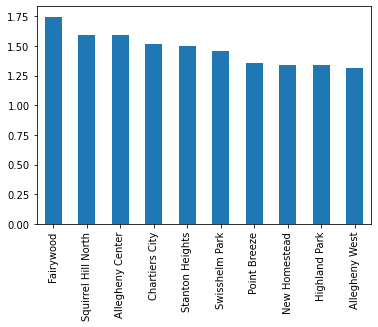

In [8]:
neighborhoodList=[]
averageCO2ValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['co2_benefits_dollar_value'].mean()
    averageCO2ValueList.append(BBB)

allData = pd.Series(averageCO2ValueList, index=neighborhoodList)
CO2 = pd.Series(averageCO2ValueList, index=neighborhoodList)
allData.sort_values(ascending=False, inplace=True)
topTenData=allData.head(10)
topTenData.plot.bar()

This is the rankings for the highest average tree dollar Value by neighborhood (by CO2). The results are close, and there is no clear winner.

Not only that, Pittsburgh is known as the "Steel City" for its industrialism. As a result, the air we breath are polluted from these industries. On the bright side, trees remove pollutants like gasses and help improve air quality. Once again, a loop is established to sum, and average the value of trees when it comes to improving Air Quality. This is done for all neighborhoods within Pittsburgh.

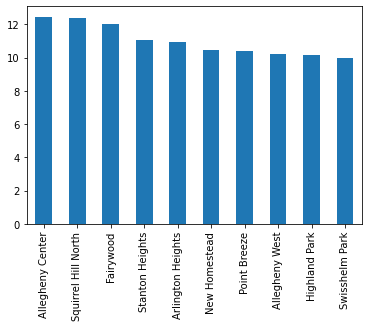

In [9]:
neighborhoodList=[]
averageAQValueList=[]
for a in q: 
    neighborhoodList.append(a)

for n in neighborhoodList:
    b = t['neighborhood'] == n
    bb = t[b]
    BBB = bb['air_quality_benfits_total_dollar_value'].mean()
    averageAQValueList.append(BBB)


allData6 = pd.Series(averageAQValueList, index=neighborhoodList)
AQ = pd.Series(averageAQValueList, index=neighborhoodList)
allData6.sort_values(ascending=False, inplace=True)
topTenData6=allData6.head(10)
topTenData6.plot.bar()


These are the rankings for the highest average Air Quality Dollar Value by neighborhood. Again, the data is very close, and there is no clear argument for a winner.

# ------------------------------------------------------------------------------------

### We are looking for the best neighborhood, so it is not enough to only have one or the other. Instead, we are looking for a neighborhood that excels in both. Therefore, I am averaging the previous two stats to find the best overall neighborhood.

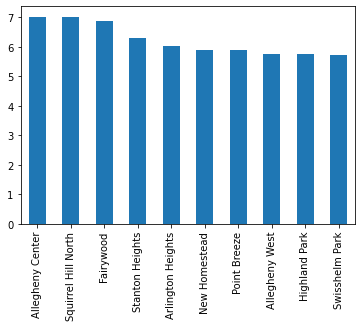

In [13]:
dataAddition = CO2+AQ
dataAddition.sort_values(ascending=False, inplace=True)
dataAddition = dataAddition/2
dataAddition
dataAddition10=dataAddition.head(10)
dataAddition10.head(10)
dataAddition10.plot.bar()

## The higher average value of trees, the more effictive those trees will be for the environment for that neighborhood. However, the top averages are extremely close and hard to tell.  

## Not only that, the current data only shows the average value of trees within a neighborhood. What does this mean? It means that the current amount of data does not take in the quantity of trees within a neighborhood. A neighborhood with ONE very good tree will beat out the average value of a neighborhood with thousands of trees, even though the latter will have a lot bigger impact on the environment.

## To compensate for this, I am multipling the average value of trees in a neighborhood by the quantity of trees in that neighborhood to find the total value of trees in the neighborhood. The higher the product, the better it is for the environment. 

In [11]:
tN = t.groupby(["neighborhood"])["neighborhood"].count()
tN.sort_values(ascending=False, inplace=True)
tN.head(5)
#Preview

neighborhood
Squirrel Hill South    5073
Highland Park          2941
Squirrel Hill North    2083
South Side Flats       1693
Shadyside              1558
Name: neighborhood, dtype: int64

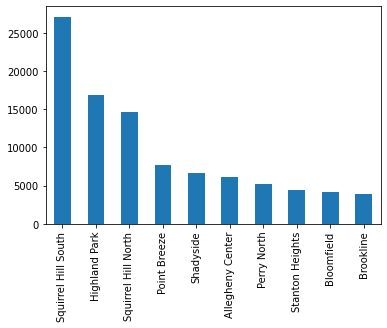

In [12]:
rankings = dataAddition*tN
rankings.sort_values(ascending=False, inplace=True)
top10Rankings = rankings.head(10)
top10Rankings.plot.bar()

# ------------------------------------------------------------------------------------

# Conclusion:

From the chart above, one neighborhood stands out way above the rest, so I can confidently declare Squirrel Hill South as THE best neighborhood in Pittsburgh according to my sub metric.

Being new to Pittsburgh, I don't really know much about other neighborhoods. But as a Pitt student, I would categorize North Oakland as my personal favorite neighborhood. Unfortunately from my data, the best neighborhood according to my submetric is not my personal favorite.

# ------------------------------------------------------------------------------------